In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
import statsmodels.api as sm


In [133]:
df = pd.read_csv('accelerometer.csv')
df.head()

,y,x1,x2,x3
0,1,1.004,0.090,-0.125
1,1,1.004,-0.043,-0.125
2,1,0.969,0.090,-0.121
3,1,0.973,-0.012,-0.137
4,1,1.000,-0.016,-0.121


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153000 entries, 0 to 152999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   y       153000 non-null  int64  
 1   x1      153000 non-null  float64
 2   x2      153000 non-null  float64
 3   x3      153000 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 4.7 MB


In [135]:
# fungsi untuk mencari quantile dan outliers
def find_outliers(data):
    
    #Hitung nilai Q1 dan Q3
    Q1 = np.quantile(data , .25)
    Q3 = np.quantile(data, .75)
    
    # Hitung nilai IQR
    IQR = Q3 - Q1
    min_IQR = Q1 - 1.5 * IQR
    max_IQR = Q3 + 1.5 * IQR
    
    # Looping dan append outliers
    lower_out = []
    upper_out = []
    
    for i in data:
        if(i < min_IQR):
            lower_out.append(i)
        elif(i > max_IQR):
            upper_out.append(i)
            
    return lower_out, upper_out

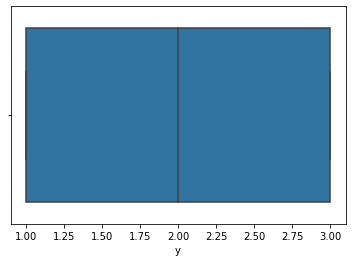

In [136]:
sns.boxplot(df["y"])
plt.show()

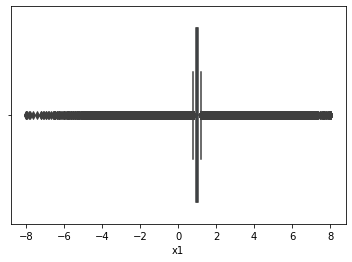

In [37]:
sns.boxplot(df["x1"])
plt.show()

In [38]:
# cari outliers dengan fungsi IQR
lower_out = find_outliers(df["x1"])[0]
upper_out = find_outliers(df["x1"])[1]

In [39]:
# cek jumlah outliers
outliers = len(lower_out) + len(upper_out)
print("Jumlah Outliers:", outliers)

Jumlah Outliers: 37984


In [40]:
# cek presentase outliers
print("Jumlah Data :", len(df))
print("Jumlah Outliers :", outliers)
print("Perc Outliers :", round((outliers/len(df))*100,2),"%")

Jumlah Data : 153000
Jumlah Outliers : 37984
Perc Outliers : 24.83 %


In [41]:
# Hitung nilai IQR dan batas atas
iqr = df["x1"].quantile(.75) - df['x1'].quantile(.25)
upper_limit = df["x1"].quantile(.75) + 1.5 * iqr

print("Upper Limit:", upper_limit)

Upper Limit: 1.18


In [42]:
# cari batas quantile untuk winsorize
df["x1"].quantile(.65)

1.016

In [43]:
# gunakan winsorize dengan bantuan scipy
df["x1"] = stats.mstats.winsorize(df["x1"], limits = (0, 0.35))

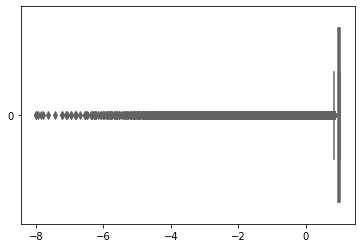

In [44]:
# visualisasi dengan boxplot
sns.boxplot(data = df["x1"], palette = "Accent", orient = 'h')
plt.show()

In [48]:
# Hitung nilai IQR dan batas atas
iqr = df["x1"].quantile(.25) - df['x1'].quantile(.75)
lower_limit = df["x1"].quantile(.25) + 1.5 * iqr

print("Lower Limit:", lower_limit)

Lower Limit: 0.8384999999999998


In [54]:
# cari batas quantile untuk winsorize
df["x1"].quantile(.13)

0.816

In [58]:
# gunakan winsorize dengan bantuan scipy
df["x1"] = stats.mstats.winsorize(df["x1"], limits = (0.87, 0))

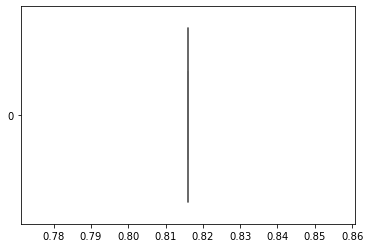

In [59]:
# visualisasi dengan boxplot
sns.boxplot(data = df["x1"], palette = "Accent", orient = 'h')
plt.show()

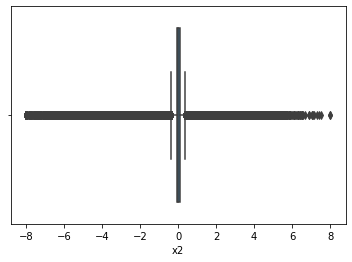

In [60]:
sns.boxplot(df["x2"])
plt.show()

In [61]:
# cari outliers dengan fungsi IQR
lower_out = find_outliers(df["x2"])[0]
upper_out = find_outliers(df["x2"])[1]

In [62]:
# cek jumlah outliers
outliers = len(lower_out) + len(upper_out)
print("Jumlah Outliers:", outliers)

Jumlah Outliers: 30135


In [63]:
# cek presentase outliers
print("Jumlah Data :", len(df))
print("Jumlah Outliers :", outliers)
print("Perc Outliers :", round((outliers/len(df))*100,2),"%")

Jumlah Data : 153000
Jumlah Outliers : 30135
Perc Outliers : 19.7 %


In [64]:
# Hitung nilai IQR dan batas atas
iqr = df["x2"].quantile(.75) - df['x2'].quantile(.25)
upper_limit = df["x2"].quantile(.75) + 1.5 * iqr

print("Upper Limit:", upper_limit)

Upper Limit: 0.37949999999999995


In [72]:
# cari batas quantile untuk winsorize
df["x2"].quantile(.89)

0.352

In [73]:
# gunakan winsorize dengan bantuan scipy
df["x2"] = stats.mstats.winsorize(df["x2"], limits = (0, 0.11))

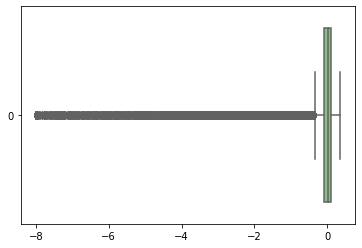

In [74]:
# visualisasi dengan boxplot
sns.boxplot(data = df["x2"], palette = "Accent", orient = 'h')
plt.show()

In [75]:
# Hitung nilai IQR dan batas atas
iqr = df["x2"].quantile(.25) - df['x2'].quantile(.75)
lower_limit = df["x2"].quantile(.25) + 1.5 * iqr

print("Lower Limit:", lower_limit)

Lower Limit: -0.3525


In [86]:
# cari batas quantile untuk winsorize
df["x2"].quantile(.10)

-0.312

In [87]:
# gunakan winsorize dengan bantuan scipy
df["x2"] = stats.mstats.winsorize(df["x2"], limits = (0.90, 0))

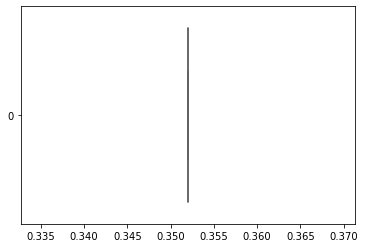

In [88]:
# visualisasi dengan boxplot
sns.boxplot(data = df["x2"], palette = "Accent", orient = 'h')
plt.show()

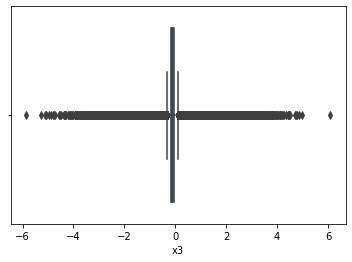

In [92]:
sns.boxplot(df["x3"])
plt.show()

In [89]:
# cari outliers dengan fungsi IQR
lower_out = find_outliers(df["x3"])[0]
upper_out = find_outliers(df["x3"])[1]

In [90]:
# cek jumlah outliers
outliers = len(lower_out) + len(upper_out)
print("Jumlah Outliers:", outliers)

Jumlah Outliers: 43205


In [91]:
# cek presentase outliers
print("Jumlah Data :", len(df))
print("Jumlah Outliers :", outliers)
print("Perc Outliers :", round((outliers/len(df))*100,2),"%")

Jumlah Data : 153000
Jumlah Outliers : 43205
Perc Outliers : 28.24 %


In [93]:
# Hitung nilai IQR dan batas atas
iqr = df["x3"].quantile(.75) - df['x3'].quantile(.25)
upper_limit = df["x3"].quantile(.75) + 1.5 * iqr

print("Upper Limit:", upper_limit)

Upper Limit: 0.09299999999999997


In [100]:
# cari batas quantile untuk winsorize
df["x3"].quantile(.96)

0.762

In [101]:
# gunakan winsorize dengan bantuan scipy
df["x3"] = stats.mstats.winsorize(df["x3"], limits = (0, 0.4))

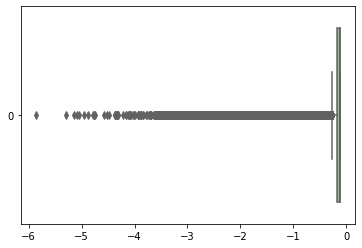

In [102]:
# visualisasi dengan boxplot
sns.boxplot(data = df["x3"], palette = "Accent", orient = 'h')
plt.show()

In [103]:
# Hitung nilai IQR dan batas atas
iqr = df["x3"].quantile(.25) - df['x3'].quantile(.75)
lower_limit = df["x3"].quantile(.25) + 1.5 * iqr

print("Lower Limit:", lower_limit)

Lower Limit: -0.26049999999999995


In [105]:
# cari batas quantile untuk winsorize
df["x3"].quantile(.9)

-0.113

In [106]:
# gunakan winsorize dengan bantuan scipy
df["x3"] = stats.mstats.winsorize(df["x3"], limits = (0.91, 0))

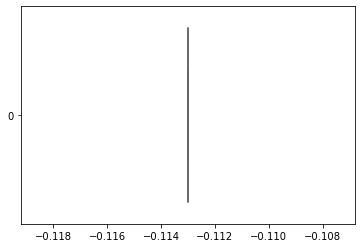

In [107]:
# visualisasi dengan boxplot
sns.boxplot(data = df["x3"], palette = "Accent", orient = 'h')
plt.show()

# Feature Engineering

In [137]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [138]:
standard = StandardScaler()
MinMax  = MinMaxScaler()

In [139]:
# standarScaler
X_standard = standard.fit_transform(X)
X_standard = pd.DataFrame(X_standard, columns=['x1','x2','x3'])
X_standard

,x1,x2,x3
0,-6.661338e-16,-5.551115e-17,1.387779e-17
1,-6.661338e-16,-5.551115e-17,1.387779e-17
2,-6.661338e-16,-5.551115e-17,1.387779e-17
3,-6.661338e-16,-5.551115e-17,1.387779e-17
4,-6.661338e-16,-5.551115e-17,1.387779e-17
...,...,...,...
152995,-6.661338e-16,-5.551115e-17,1.387779e-17
152996,-6.661338e-16,-5.551115e-17,1.387779e-17
152997,-6.661338e-16,-5.551115e-17,1.387779e-17
152998,-6.661338e-16,-5.551115e-17,1.387779e-17


In [140]:
X_standard.describe()

,x1,x2,x3
count,1.530000e+05,1.530000e+05,1.530000e+05
mean,-6.661338e-16,-5.551115e-17,1.387779e-17
std,0.000000e+00,0.000000e+00,0.000000e+00
min,-6.661338e-16,-5.551115e-17,1.387779e-17
25%,-6.661338e-16,-5.551115e-17,1.387779e-17
50%,-6.661338e-16,-5.551115e-17,1.387779e-17
75%,-6.661338e-16,-5.551115e-17,1.387779e-17
max,-6.661338e-16,-5.551115e-17,1.387779e-17


<AxesSubplot:xlabel='x2', ylabel='Density'>

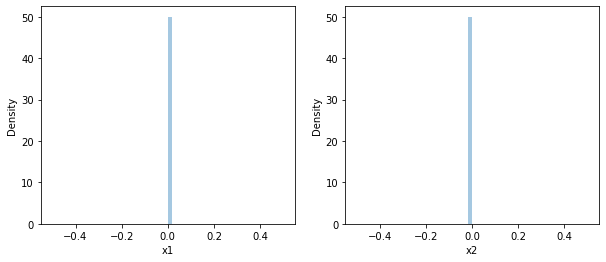

In [141]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.distplot(X_standard['x1'])
plt.subplot(1,2,2)
sns.distplot(X_standard['x2'])


In [142]:
X_train,x_test,y_train,y_test = train_test_split(X_standard,y,test_size=0.3,random_state=42)

In [143]:
K = 5
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train,y_train)

KNeighborsClassifier()

In [144]:
y_pred = model.predict(x_test)

In [145]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.33      1.00      0.50     15253
           2       0.00      0.00      0.00     15301
           3       0.00      0.00      0.00     15346

    accuracy                           0.33     45900
   macro avg       0.11      0.33      0.17     45900
weighted avg       0.11      0.33      0.17     45900



In [146]:
# standarScaler
X_MinMax= MinMax.fit_transform(X)
X_MinMax = pd.DataFrame(X_MinMax, columns=['x1','x2','x3'])
X_MinMax


,x1,x2,x3
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
152995,0.0,0.0,0.0
152996,0.0,0.0,0.0
152997,0.0,0.0,0.0
152998,0.0,0.0,0.0


In [147]:
X_MinMax.describe()

,x1,x2,x3
count,153000.0,153000.0,153000.0
mean,0.0,0.0,0.0
std,0.0,0.0,0.0
min,0.0,0.0,0.0
25%,0.0,0.0,0.0
50%,0.0,0.0,0.0
75%,0.0,0.0,0.0
max,0.0,0.0,0.0


<AxesSubplot:xlabel='x2', ylabel='Density'>

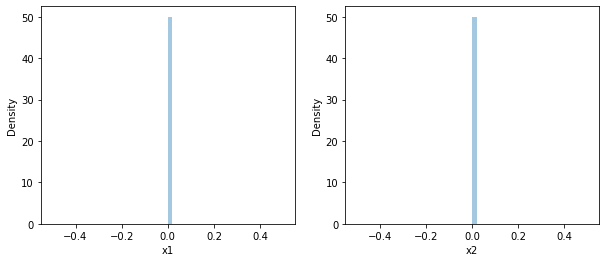

In [148]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(X_MinMax['x1'])
plt.subplot(1,2,2)
sns.distplot(X_MinMax['x2'])


<AxesSubplot:xlabel='x3', ylabel='Density'>

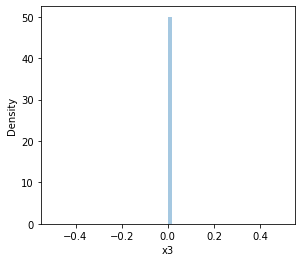

In [149]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(X_MinMax['x3'])

In [150]:
X_train,x_test,y_train,y_test = train_test_split(X_MinMax,y,test_size=0.3,random_state=42)

In [151]:
K = 5
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train,y_train)

KNeighborsClassifier()

In [152]:
y_pred = model.predict(x_test)

In [153]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.33      1.00      0.50     15253
           2       0.00      0.00      0.00     15301
           3       0.00      0.00      0.00     15346

    accuracy                           0.33     45900
   macro avg       0.11      0.33      0.17     45900
weighted avg       0.11      0.33      0.17     45900

